In [1]:
import sys
import os
import numpy as np
import pandas as pd

# 将项目根目录添加到 sys.path
#current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from training import train, train_per_iteration
import torch
from utils import ring1, show_row, Row

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.semilogy(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.semilogy(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=10, linestyle='None')
    
    for i in range(len(grads)):
        plt.semilogy(np.arange(xlen), grads[i], linewidth=2, color=colors[i])
    
    plt.legend(legend, prop={'size': 23, 'weight': 'bold'},loc='upper right',)
    plt.xlabel('Iteration', fontsize=40, fontweight='bold')
    plt.ylabel(ylabel, fontsize=40, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    plt.yticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    
    plt.grid(True)
    plt.subplots_adjust(left=0.21, bottom=0.15)
    plt.savefig(save, bbox_inches='tight')
    plt.show()

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow_accuracy(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.plot(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.plot(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=10, linestyle='None')
    
    for i in range(len(grads)):
        plt.plot(np.arange(xlen), grads[i], linewidth=2, color=colors[i])
    
    plt.legend(legend, prop={'size': 23, 'weight': 'bold'}, loc='lower right')
    plt.xlabel('Iteration', fontsize=40, fontweight='bold')
    plt.ylabel(ylabel, fontsize=40, fontweight='bold')
    
    # 设置 y 轴范围为 0 到 100
    plt.ylim(0, 100)
    
    # 设置 y 轴刻度为 0%, 20%, 40%, 60%, 80%, 100%
    plt.yticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=35, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    
    plt.grid(True)
    plt.subplots_adjust(left=0.21, bottom=0.15)
    plt.savefig(save, bbox_inches='tight')
    plt.show()

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n=16
A, B = ring1(n=n)
k = 10
A = np.linalg.matrix_power(A, k)
show_row(A)
print(A.shape)

A的第二大特征值: 0.5230771155905988
A的beta: 0.6993711525725889
A的spectral gap: 0.30062884742741114
A的kappa: 2.0000000000000044
S_A是: 45.05614667517945 

(16, 16)


In [26]:
train_per_iteration(
    algorithm="PullDiag_GT",
    lr=5e-3,
    A=A,
    dataset_name="MNIST",
    batch_size=128,
    num_epochs=10,
    remark=f"使用,MG={k}, ring1",
)

每个节点分配到的图片数目是 3125
每个epoch执行的iteration次数是 30
optimizer初始化成功!


Training Progress: 100%|██████████| 10/10 [08:00<00:00, 48.09s/it, epoch=10, test_accuracy=94.3300%, test_loss=0.3092, train_average_accuracy=94.2300%, train_loss=0.6686]


,epoch,batch,iteration,train_loss(total),train_loss(average),train_accuracy(average),test_loss(average),test_accuracy(average)
0,1,1,1,2.3246,2.3036,0.0903,2.3037,0.0892
1,1,2,2,2.3110,2.3036,0.0903,2.3037,0.0892
2,1,3,3,2.3053,2.3035,0.0903,2.3036,0.0892
3,1,4,4,2.2904,2.3035,0.0903,2.3036,0.0892
4,1,5,5,2.2816,2.3034,0.0903,2.3035,0.0892
...,...,...,...,...,...,...,...,...
295,10,26,296,0.5714,0.3195,0.9421,0.3158,0.9429
296,10,27,297,0.5533,0.3172,0.9425,0.3133,0.9429
297,10,28,298,0.5695,0.3163,0.9424,0.3122,0.9436
298,10,29,299,0.5475,0.3153,0.9423,0.3123,0.9433


In [100]:
df1 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/使用,MG=1,_ring1_PullDiag_GT_lr=0.005_n=16_bs=128_2025-01-25.csv")
df2 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=2,_ring1_PullDiag_GT_lr=0.005_n=16_bs=128_2025-01-25.csv")
df3 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/使用,MG=5,_ring1_PullDiag_GT_lr=0.01_n=16_bs=128_2025-01-25.csv")
df4 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/使用,MG=10,_ring1_PullDiag_GT_lr=0.02_n=16_bs=128_2025-01-25.csv")
df5 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=20,_ring1_PullDiag_GT_lr=0.005_n=16_bs=128_2025-01-25.csv")

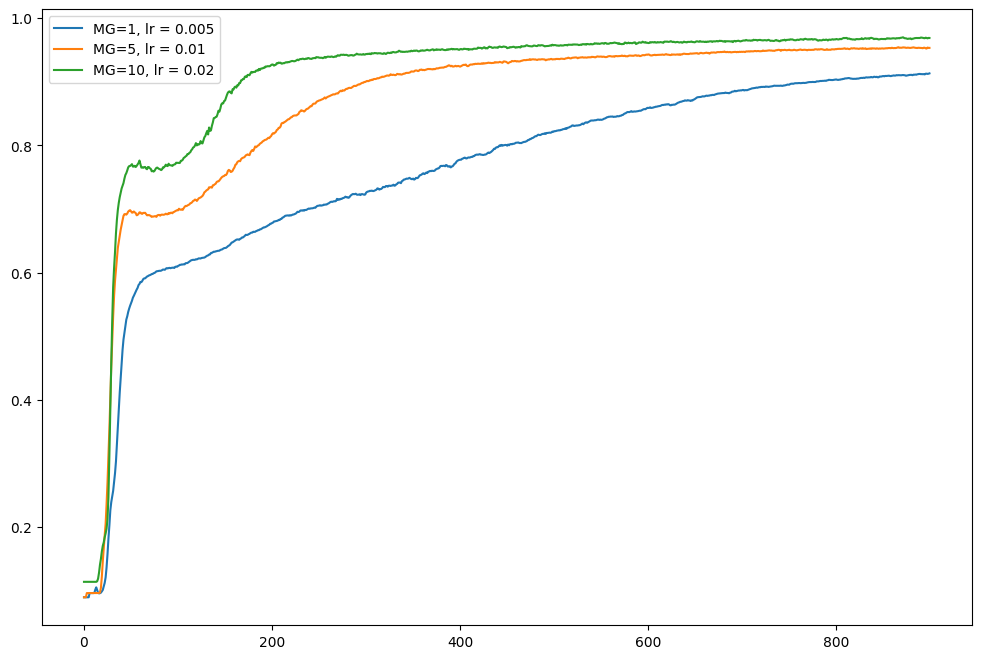

In [102]:
import matplotlib.pyplot as plt
a="test_accuracy(average)"
plt.plot(df1[a], label="MG=1, lr = 0.005")
#plt.plot(df2[a], label="MG=2")
plt.plot(df3[a], label="MG=5, lr = 0.01")
plt.plot(df4[a], label="MG=10, lr = 0.02")
#plt.plot(df5[a], label="MG=20")
plt.legend()
plt.show()

In [103]:
a = "train_loss(average)"

grads = [
    df1[a],
    df3[a],
    df4[a],
]
legend = [
    r"$MG=1$",
    r"$MG=5$",
    r"$MG=10$",
]

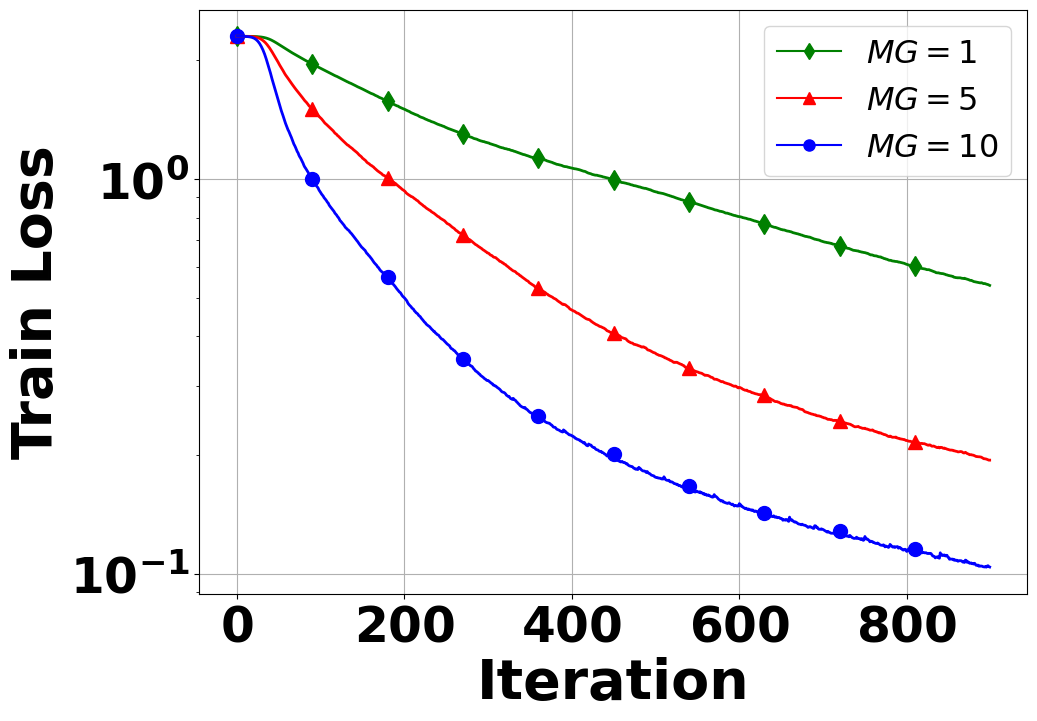

In [104]:
prettyshow(grads, legend, save='MG_RING_Loss.pdf', ylabel='Train Loss')

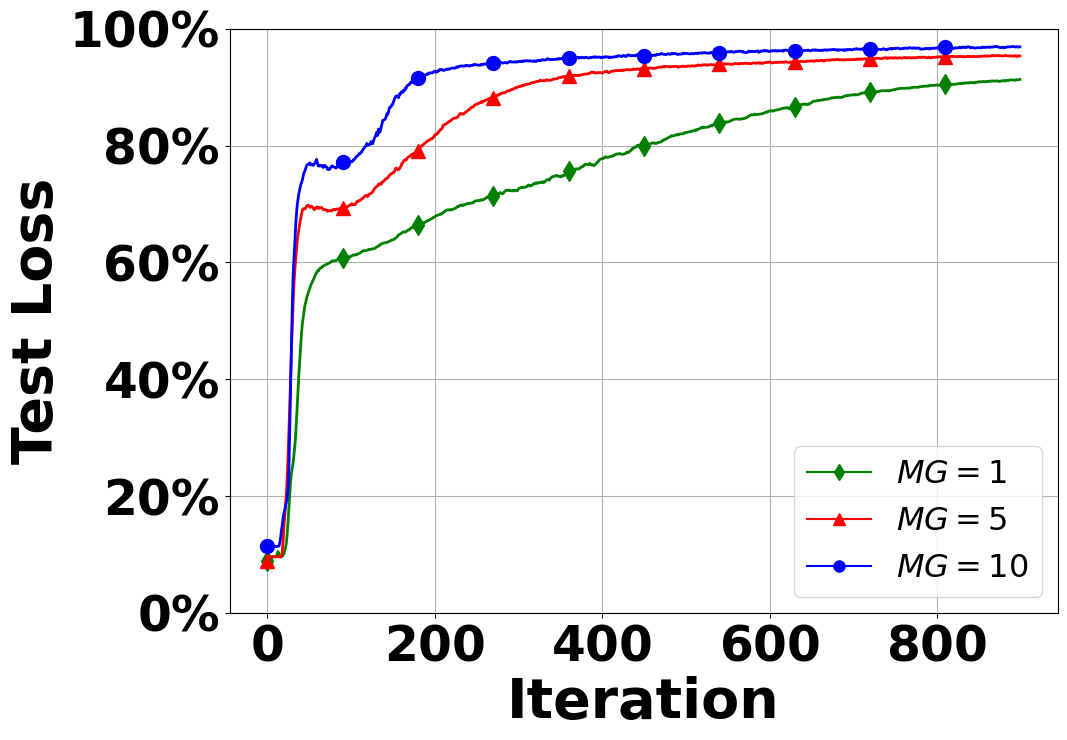

In [105]:
a = "test_accuracy(average)"

grads = [
    df1[a]*100,
    df3[a]*100,
    df4[a]*100,
]
legend = [
    r"$MG=1$",
    r"$MG=5$",
    r"$MG=10$",
]
prettyshow_accuracy(grads, legend, save='MG_RING_Accuracy.pdf', ylabel='Test Loss')

In [88]:
import numpy as np

def Row(matrix):
    """行归一化函数，确保每行和为1"""
    M = matrix.copy()
    row_sums = np.sum(M, axis=1)
    for i in range(M.shape[0]):
        M[i, :] /= row_sums[i]
    return M

def grid_16(seed=None):
    """
    生成4x4网格图的行随机矩阵，包含自环和随机权重。
    参数:
        seed (int): 控制随机权重生成的种子
    返回:
        A (np.ndarray): 行随机矩阵，shape=(16,16)
    """
    np.random.seed(seed)
    n = 16
    A = np.zeros((n, n))
    
    # 生成4x4网格的拓扑结构（含自环）
    for row in range(4):
        for col in range(4):
            node = row * 4 + col  # 当前节点编号（0~15）
            
            # 添加自环权重（1~10）
            A[node, node] = np.random.randint(1, 11)
            
            # 横向连接（右邻居）
            if col < 3:
                right_neighbor = node + 1
                A[node, right_neighbor] = np.random.randint(1, 11)
                A[right_neighbor, node] = np.random.randint(1, 11)  # 反向连接
            
            # 纵向连接（下邻居）
            if row < 3:
                down_neighbor = node + 4
                A[node, down_neighbor] = np.random.randint(1, 11)
                A[down_neighbor, node] = np.random.randint(1, 11)  # 反向连接
    
    # 行归一化
    A = Row(A)
    return A

In [89]:
A = grid_16(seed=0)
show_row(A)

A的第二大特征值: 0.392652966684275
A的beta: 0.8920261655614367
A的spectral gap: 0.10797383443856334
A的kappa: 4.269745222215895
S_A是: 181.64061108171188 



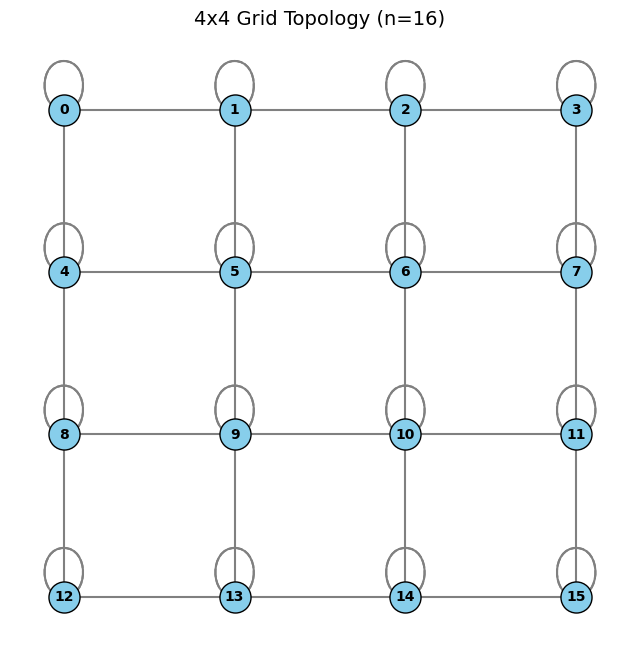

In [87]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def draw_grid_16_topology():
    """
    绘制4x4网格图的拓扑结构（与权重无关）。
    """
    # 生成拓扑结构（邻接表）
    def generate_topology():
        n = 16
        adj_list = {i: [] for i in range(n)}
        for row in range(4):
            for col in range(4):
                node = row * 4 + col
                # 自环
                adj_list[node].append(node)
                # 横向连接（右邻居）
                if col < 3:
                    right_neighbor = node + 1
                    adj_list[node].append(right_neighbor)
                    adj_list[right_neighbor].append(node)
                # 纵向连接（下邻居）
                if row < 3:
                    down_neighbor = node + 4
                    adj_list[node].append(down_neighbor)
                    adj_list[down_neighbor].append(node)
        return adj_list

    # 生成邻接表
    adj_list = generate_topology()

    # 创建图对象
    G = nx.Graph()

    # 添加节点和边
    for node, neighbors in adj_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # 设置节点位置（4x4网格布局）
    pos = {}
    for row in range(4):
        for col in range(4):
            node = row * 4 + col
            pos[node] = (col, 3 - row)  # 从左到右，从上到下排列

    # 绘制图
    plt.figure(figsize=(8, 8))
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', edgecolors='black')
    
    # 绘制边
    nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')
    
    # 绘制自环
    nx.draw_networkx_edges(
        G, pos, edgelist=[(node, node) for node in G.nodes()],
        width=1.5, edge_color='gray', style='dashed'
    )
    
    # 绘制节点标签
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # 设置标题和显示
    plt.title("4x4 Grid Topology (n=16)", fontsize=14)
    plt.axis('off')  # 关闭坐标轴
    plt.show()

# 绘制拓扑图
draw_grid_16_topology()

In [90]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n=16
A= grid_16(seed=1)
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print(A.shape)

A的第二大特征值: 1.0000000000000013
A的beta: 0.8878667905289672
A的spectral gap: 0.11213320947103278
A的kappa: 6.249282972296092
S_A是: 202.07870593170108 

(16, 16)


In [38]:
train_per_iteration(
    algorithm="PullDiag_GT",
    lr=2e-2,
    A=A,
    dataset_name="MNIST",
    batch_size=128,
    num_epochs=10,
    remark=f"MG={k}, GRID16",
)

每个节点分配到的图片数目是 3125
每个epoch执行的iteration次数是 30
optimizer初始化成功!


Training Progress: 100%|██████████| 10/10 [16:19<00:00, 97.92s/it, epoch=10, test_accuracy=94.0400%, test_loss=0.3324, train_average_accuracy=93.9300%, train_loss=0.6137] 


,epoch,batch,iteration,train_loss(total),train_loss(average),train_accuracy(average),test_loss(average),test_accuracy(average)
0,1,1,1,2.3311,2.3034,0.0903,2.3035,0.0892
1,1,2,2,2.3146,2.3033,0.0903,2.3034,0.0892
2,1,3,3,2.2996,2.3032,0.0903,2.3034,0.0892
3,1,4,4,2.2868,2.3032,0.0903,2.3033,0.0892
4,1,5,5,2.2761,2.3030,0.0903,2.3032,0.0892
...,...,...,...,...,...,...,...,...
295,10,26,296,0.6072,0.3462,0.9398,0.3398,0.9409
296,10,27,297,0.5963,0.3448,0.9396,0.3387,0.9400
297,10,28,298,0.5936,0.3427,0.9394,0.3364,0.9414
298,10,29,299,0.5748,0.3406,0.9393,0.3347,0.9410


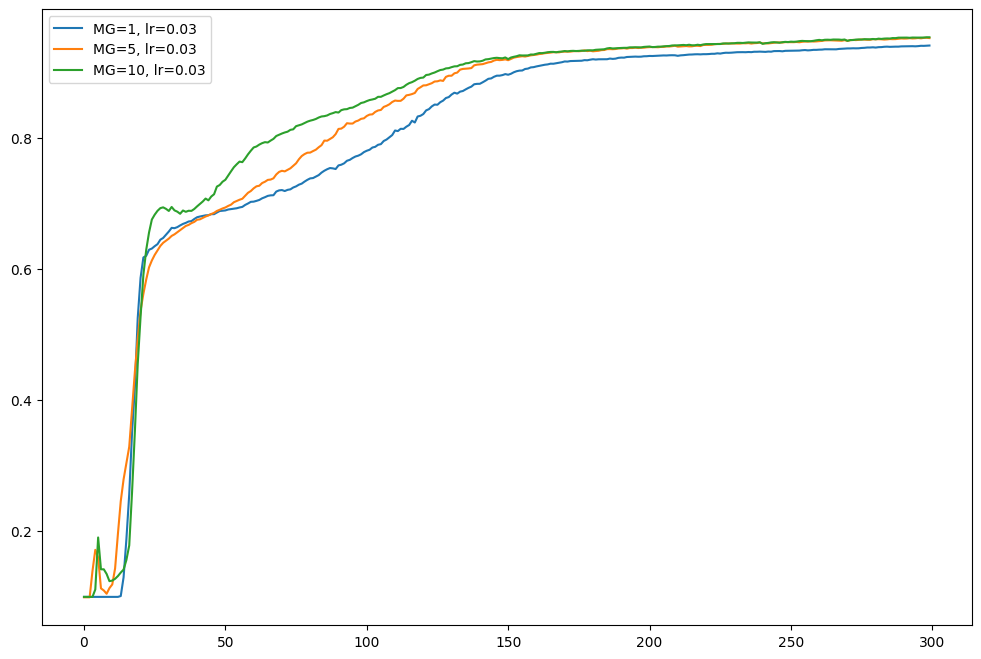

In [106]:
df1 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=1,_GRID16_PullDiag_GT_lr=0.01_n=16_bs=128_2025-01-25.csv")
df2 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=1,_GRID16_PullDiag_GT_lr=0.02_n=16_bs=128_2025-01-25.csv")
df3 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=1,_GRID16_PullDiag_GT_lr=0.03_n=16_bs=128_2025-01-25.csv")
df4 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=2,_GRID16_PullDiag_GT_lr=0.02_n=16_bs=128_2025-01-25.csv")
df5 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=5,_GRID16_PullDiag_GT_lr=0.03_n=16_bs=128_2025-01-25.csv")
df6 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=10,_GRID16_PullDiag_GT_lr=0.03_n=16_bs=128_2025-01-25.csv")

a="train_accuracy(average)"

#plt.plot(df1[a], label="MG=1, lr=0.01")
#plt.plot(df2[a], label="MG=1, lr=0.02")
plt.plot(df3[a], label="MG=1, lr=0.03")
#plt.plot(df4[a], label="MG=2, lr=0.02")
plt.plot(df5[a], label="MG=5, lr=0.03")
plt.plot(df6[a], label="MG=10, lr=0.03")
plt.legend()
plt.show()

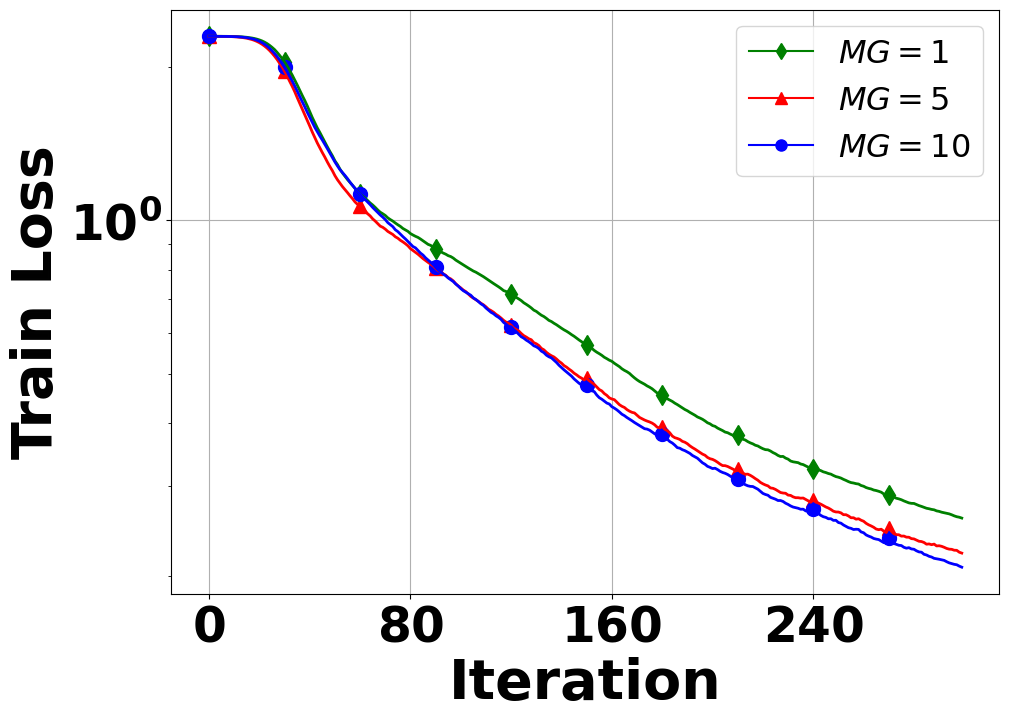

In [107]:
a = "train_loss(average)"

grads = [
    df3[a],
    df5[a],
    df6[a],
]
legend = [
    r"$MG=1$",
    r"$MG=5$",
    r"$MG=10$",
]

prettyshow(grads, legend, save='MG_GRID_Loss.pdf', ylabel='Train Loss')

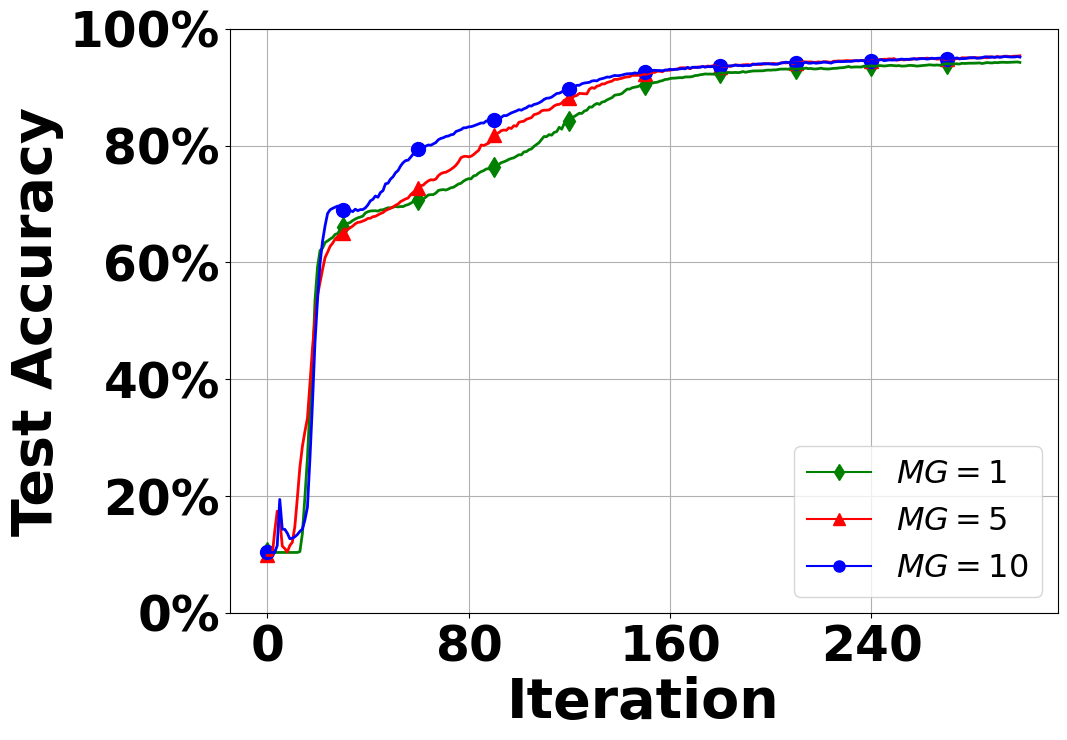

In [108]:
a = "test_accuracy(average)"

grads = [
    df3[a]*100,
    df5[a]*100,
    df6[a]*100,
]
legend = [
    r"$MG=1$",
    r"$MG=5$",
    r"$MG=10$",
]

prettyshow_accuracy(grads, legend, save='MG_GRID_Accuracy.pdf', ylabel='Test Accuracy')